In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats

In [2]:
df_movie_1 = pd.read_csv("Expanded_data/movie.expanded_metadata.tsv",sep='\t')
print(df_movie_1.shape)
df_movie_1.head()

(81741, 9)


,Wikipedia movie ID,Freebase movie ID,Movie name,Movie release date,Movie box office revenue,Movie runtime,Movie languages (Freebase ID:name tuples),Movie countries (Freebase ID:name tuples),Movie genres (Freebase ID:name tuples)
0,142780.0,/m/011_mj,The Circus,1928-01-06,NaN,68.0,"{""/m/06ppq"": ""Silent film"", ""/m/02h40lc"": ""Eng...","{""/m/09c7w0"": ""United States of America""}","{""/m/06cvj"": ""Romantic comedy"", ""/m/06ppq"": ""S..."
1,142786.0,/m/011_p6,Thunderbolt,1929,NaN,91.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/07s9rl0"": ""Drama"", ""/m/01g6gs"": ""Black-an..."
2,142822.0,/m/011_zy,The Green Goddess,1930-02-13,NaN,73.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02rd8h3"": ""Goat gland"", ""/m/07s9rl0"": ""Dr..."
3,142049.0,/m/011wtv,Minority Report,2002-06-17,358372926.0,139.0,"{""/m/06mp7"": ""Swedish Language"", ""/m/02h40lc"":...","{""/m/09c7w0"": ""United States of America""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/01jfsb"": ""Th..."
4,142327.0,/m/011x_4,Groundhog Day,1993-02-12,70906973.0,101.0,"{""/m/064_8sq"": ""French Language"", ""/m/02bjrlw""...","{""/m/09c7w0"": ""United States of America""}","{""/m/06cvj"": ""Romantic comedy"", ""/m/07s9rl0"": ..."


In [2]:
df_movie = pd.read_csv("Expanded_data/IMDB_wiki.tsv",sep='\t')
print(df_movie.shape)
df_movie.head()

C:\Users\lisap\AppData\Local\Temp/ipykernel_12236/1548154688.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df_movie = pd.read_csv("Expanded_data/IMDB_wiki.tsv",sep='\t')


(9385370, 9)


,Freebase movie ID,Movie name,Movie release date,genre1,genre2,genre3,averageRating,numVotes,Movie box office revenue
0,/m/0100_m55,Urban Animals,1987,Comedy,Sci-Fi,NaN,5.2,79.0,NaN
1,/m/0100_mnm,NaN,1999,Comedy,NaN,NaN,5.8,15.0,NaN
2,/m/0100_nzr,NaN,1999,Drama,NaN,NaN,4.8,119.0,NaN
3,/m/0100_pgp,NaN,1988,Comedy,NaN,NaN,6.8,103.0,NaN
4,/m/0100_pz9,NaN,1985,Comedy,NaN,NaN,2.4,59.0,NaN


In [4]:
print('Sum of NaN in each feature : ')
df_movie.isna().sum(axis = 0)

Sum of NaN in each feature : 


Freebase movie ID           9262986
Movie name                  8059519
Movie release date             6661
genre1                        23280
genre2                      5393432
genre3                      7833573
averageRating               8139222
numVotes                    8139222
Movie box office revenue    9375163
dtype: int64

### Genre distribution

In [5]:
#remove nan
df_genre = df_movie[~df_movie['genre1'].isna()]
#remove '\N' 
df_genre = df_genre[df_genre.genre1 != "\\N"]


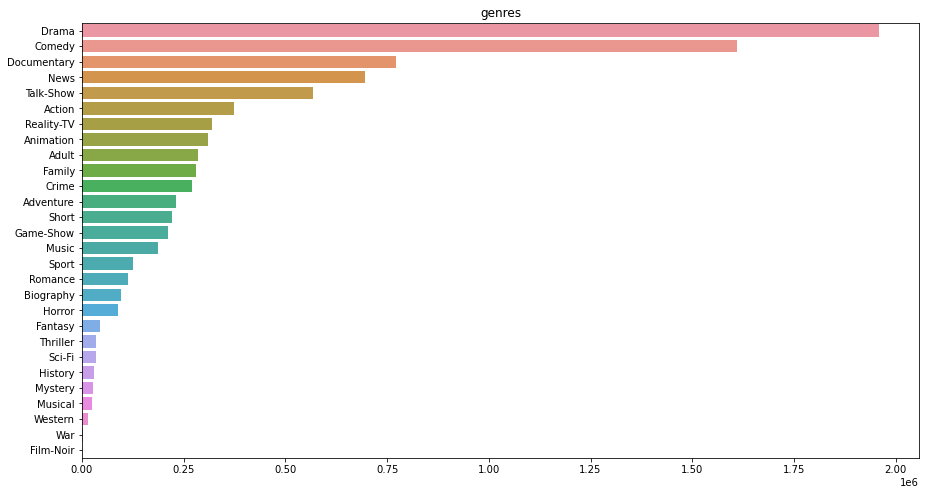

In [6]:
count_genre = df_genre.genre1.value_counts()

plt.figure(figsize=(15,8))
ax = sns.barplot(x=count_genre.values, y=count_genre.index).set(title='genres')
plt.show()


### Year distribution

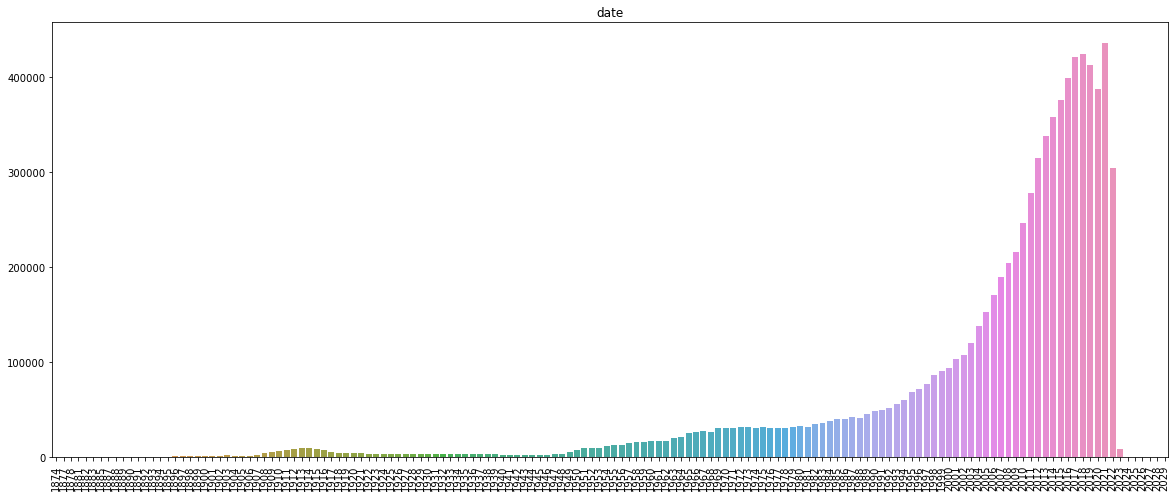

In [7]:
df_date = df_movie[~df_movie['Movie release date'].isna()]
df_date = df_date[df_date['Movie release date'] != "\\N"]

df_date['Movie release date'] = pd.to_datetime(df_date['Movie release date'], errors='coerce') # ajoute 01-01 pour ceux sans jour et mois
df_date['Movie release year'] = df_date['Movie release date'].dt.year.astype('Int64')
count_per_year = df_date['Movie release year'].value_counts()
plt.figure(figsize=(20,8))
ax = sns.barplot(x=count_per_year.index, y=count_per_year.values).set(title='date')
plt.xticks(rotation='vertical')
plt.show()

In [8]:
print(count_per_year[1896])
print(count_per_year[1897])
print(count_per_year[2023])
print(count_per_year[2024])

# 1897 : more than 1000 movies until 2023

900
1372
8472
433


### Genre per year

In [ ]:
#remove nan
df_genre_date = df_date[~df_date['genre1'].isna()]
#remove '\N' 
df_genre_date = df_genre_date[df_genre_date.genre1 != "\\N"]

MemoryError: Unable to allocate 296. MiB for an array with shape (5, 7753778) and data type object

In [ ]:
df_genre_date.groupby(['Movie release year', 'genre1']).size().unstack().plot(kind='bar', stacked=True)
#illisible

In [ ]:
# Plot relative number of genres per year

cross_tab_prop = pd.crosstab(index=df_genre_date['Movie release year'],
                             columns=df_genre_date['genre1'],
                             normalize="index")
cross_tab_prop

In [ ]:
cross_tab = pd.crosstab(index=df_genre_date['Movie release year'],
                        columns=df_genre_date['genre1'])
cross_tab

In [ ]:
cross_tab_prop.plot(kind='bar', 
                    stacked=True,  
                    figsize=(50, 6))

plt.legend(loc="upper left", ncol=2)
plt.xlabel("Movie release year")
plt.ylabel("Proportion")
plt.show()

#### Genre per year (retirer valeurs rares)

In [ ]:
# Reduce number of genres (otherwise not lisibe on the graphs)
thr_genre = 300000 #minimal number of movies with a certain genre

# Select the values where the count is less than 3 (or 5 if you like)
to_remove = count_genre[count_genre <= thr_genre].index

# Keep rows where the city column is not in to_remove
df_genre_date_thr = df_genre_date[~df_genre_date.genre1.isin(to_remove)]

In [ ]:
# print only from 1897 (more than 1000 movies)
df_genre_date_thr = df_genre_date_thr[df_genre_date_thr['Movie release year']>=1897]
df_genre_date_thr = df_genre_date_thr[df_genre_date_thr['Movie release year']<=2023]

cross_tab_prop = pd.crosstab(index=df_genre_date_thr['Movie release year'],
                             columns=df_genre_date_thr['genre1'],
                             normalize="index")
cross_tab_prop.plot(kind='bar', 
                    stacked=True,
                    colormap='tab20',
                    figsize=(50, 6))

plt.legend(loc="upper left", ncol=2)
plt.xlabel("Movie release year")
plt.ylabel("Proportion")
plt.show()

## An overview of rating and revenue

The rating is represented in the column 'averageRating' and it ranges from 0 to 10, where 10 is the best score and 0 is the lowest.

Since we want to consider both the rating and the revenu at the same time, we remove the rows that have NaN in the column 'averageRating' or 'Movie box office revenue'.

In [3]:
revenue = df_movie.copy()
revenue = revenue[revenue['Movie box office revenue'].notna()]
revenue = revenue[revenue['averageRating'].notna()]

In [4]:
revenue['averageRating'].describe()

count    9570.000000
mean        6.352456
std         1.021944
min         1.000000
25%         5.800000
50%         6.400000
75%         7.000000
max         9.300000
Name: averageRating, dtype: float64

In [5]:
revenue.head()

,Freebase movie ID,Movie name,Movie release date,genre1,genre2,genre3,averageRating,numVotes,Movie box office revenue
9,/m/0100blym,Testament of Youth,2014,Biography,Drama,History,7.2,29157.0,1800000.0
33,/m/0100khzv,Leviathan,2014,Crime,Drama,NaN,7.6,53861.0,4100000.0
231,/m/0105j_71,Spy,2015,Action,Comedy,NaN,7.0,245920.0,235700000.0
303,/m/0106bp29,The Last Face,2016,Drama,Romance,War,4.9,5159.0,1200000.0
465,/m/0109gmqq,Babysitting,2014,Comedy,NaN,NaN,6.7,10765.0,1080000.0


In [6]:
revenue['Movie release date'] = pd.to_datetime(revenue['Movie release date'], errors='coerce')
revenue['Movie release date'] = revenue['Movie release date'].dt.year.astype('Int64')

### Plots

Let's plot the variables!

In [7]:
years = revenue['Movie release date'].unique()
mean_revenue = np.zeros_like(years)
median_revenue = np.zeros_like(years)
mean_rating = np.zeros_like(years)
median_rating = np.zeros_like(years)
for i,y in enumerate(years):
    
    rev = revenue.loc[revenue['Movie release date'] == y]['Movie box office revenue']
    rat = revenue.loc[revenue['Movie release date'] == y]['averageRating']
    
    mean = np.mean(rev)
    median = np.median(rev)
    mean_revenue[i] = mean
    median_revenue[i] = median
    
    mean = np.mean(rat)
    median = np.median(rat)
    mean_rating[i] = mean
    median_rating[i] = median

C:\Users\lisap\anaconda3\envs\IPLAB\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\lisap\anaconda3\envs\IPLAB\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


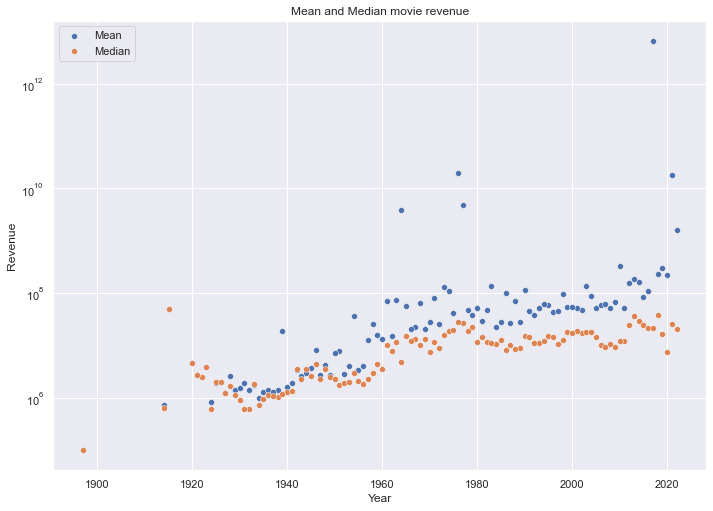

In [8]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
splot = sns.scatterplot(years, mean_revenue,label='Mean')
splot = sns.scatterplot(years, median_revenue,label='Median')
splot.set(yscale="log")
plt.title('Mean and Median movie revenue')
plt.xlabel('Year')
plt.ylabel('Revenue')
plt.show()

C:\Users\lisap\anaconda3\envs\IPLAB\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\lisap\anaconda3\envs\IPLAB\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


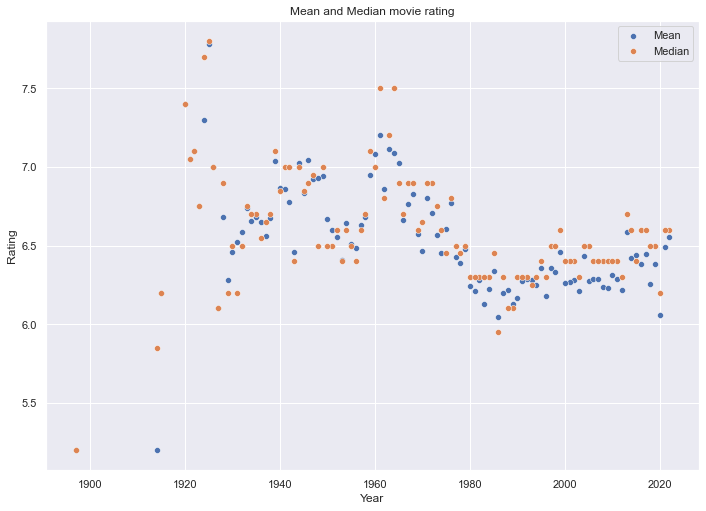

In [9]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
splot = sns.scatterplot(years, mean_rating,label='Mean')
splot = sns.scatterplot(years, median_rating,label='Median')
plt.title('Mean and Median movie rating')
plt.xlabel('Year')
plt.ylabel('Rating')
plt.show()

Let's try to do some statistics. It seems that the mean rating and the mean revenue are not linearly correlated. The median values seem to be significantly correlated but the coefficient is quite small (-0.2).

In [10]:
stats.pearsonr(mean_rating,mean_revenue)

(-0.024072580938038664, 0.806503485956121)

In [11]:
stats.pearsonr(median_rating,median_revenue)

(-0.19916442838153042, 0.04068130548378155)

In order to really draw conclusion we should take into consideration the inflation!

In [12]:
df_inflation = pd.read_csv("Inflation_data/inflation.csv",header=2)
df_inflation.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Unnamed: 66
0,Aruba,ABW,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,-2.372065,0.421441,0.474764,-0.931196,-1.028282,3.626041,4.257462,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,5.750981,5.370290,5.250171,6.571396,6.399343,4.720811,4.120246,5.404815,7.240978,NaN
2,Afghanistan,AFG,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,7.385772,4.673996,-0.661709,4.383892,4.975952,0.626149,2.302373,NaN,NaN,NaN
3,Africa Western and Central,AFW,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,2.439201,1.758052,2.130268,1.494564,1.764635,1.784050,1.758565,2.492522,3.925603,NaN
4,Angola,AGO,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,8.777814,7.280387,9.150372,30.695313,29.843587,19.628608,17.081215,NaN,NaN,NaN


In [13]:
usa_inflation = df_inflation.loc[df_inflation["Country Code"]=="USA"]

In [14]:
usa_inflation.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Unnamed: 66
251,United States,USA,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,1.457976,1.070724,1.198773,1.239669,1.278912,1.585169,...,1.464833,1.622223,0.118627,1.261583,2.13011,2.442583,1.81221,1.233584,4.697859,NaN


In [16]:
inflation_coef = np.zeros(63)
inflation_coef[0] = 1

In [17]:
for i in range(62):
    year = i + 1960
    inflation_coef[i+1] = inflation_coef[i] * (1 + usa_inflation[str(year)]/100)

In [18]:
inflation_coef

array([1.        , 1.01457976, 1.02544311, 1.03773585, 1.05060034,
       1.06403659, 1.08090337, 1.11349342, 1.14436821, 1.19325329,
       1.25843339, 1.33190395, 1.38907947, 1.43453402, 1.52315609,
       1.69153802, 1.84619783, 1.95225843, 2.07918811, 2.2378502 ,
       2.4897084 , 2.82704403, 3.11921098, 3.31046312, 3.41680961,
       3.56375071, 3.69010863, 3.76014866, 3.89794168, 4.05688965,
       4.25271584, 4.48227559, 4.67209834, 4.81360778, 4.95568897,
       5.08490566, 5.2275586 , 5.38078902, 5.50657519, 5.5920526 ,
       5.71440823, 5.90737564, 6.07432819, 6.17066895, 6.310749  ,
       6.47970269, 6.6995426 , 6.91566609, 7.1129474 , 7.38602058,
       7.35975986, 7.48046312, 7.71660949, 7.87629217, 7.99166667,
       8.12130932, 8.1309434 , 8.23352201, 8.40890509, 8.6142996 ,
       8.77040881, 8.8785992 , 9.29570326])

In [19]:
inflation_revenue = revenue.loc[(revenue["Movie release date"] <= 2021) & (revenue["Movie release date"] >= 1959)]

In [20]:
revenue

,Freebase movie ID,Movie name,Movie release date,genre1,genre2,genre3,averageRating,numVotes,Movie box office revenue
9,/m/0100blym,Testament of Youth,2014,Biography,Drama,History,7.2,29157.0,1800000.0
33,/m/0100khzv,Leviathan,2014,Crime,Drama,NaN,7.6,53861.0,4100000.0
231,/m/0105j_71,Spy,2015,Action,Comedy,NaN,7.0,245920.0,235700000.0
303,/m/0106bp29,The Last Face,2016,Drama,Romance,War,4.9,5159.0,1200000.0
465,/m/0109gmqq,Babysitting,2014,Comedy,NaN,NaN,6.7,10765.0,1080000.0
...,...,...,...,...,...,...,...,...,...
9347419,NaN,Post Mortem,2020,Horror,Mystery,Thriller,5.5,2284.0,141915.0
9348864,NaN,NaN,2018,Action,Comedy,NaN,5.1,139.0,235600000.0
9349543,NaN,Jim Button and the Wild 13,2020,Adventure,Comedy,Family,6.3,621.0,6880898.0
9380630,NaN,Manoharam,2019,Comedy,Drama,NaN,6.8,827.0,56200000.0


In [21]:
def get_inflation(year):
    x = year-1959
    return inflation_coef[-1]/inflation_coef[x]

In [22]:
inflation_revenue["Inflation"] = inflation_revenue["Movie box office revenue"]*inflation_revenue["Movie release date"].apply(get_inflation)

C:\Users\lisap\AppData\Local\Temp/ipykernel_12236/2179505125.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inflation_revenue["Inflation"] = inflation_revenue["Movie box office revenue"]*inflation_revenue["Movie release date"].apply(get_inflation)


In [40]:
inflation_revenue

,Freebase movie ID,Movie name,Movie release date,genre1,genre2,genre3,averageRating,numVotes,Movie box office revenue,Inflation
9,/m/0100blym,Testament of Youth,2014,Biography,Drama,History,7.2,29157.0,1800000.0,2.060292e+06
33,/m/0100khzv,Leviathan,2014,Crime,Drama,NaN,7.6,53861.0,4100000.0,4.692887e+06
231,/m/0105j_71,Spy,2015,Action,Comedy,NaN,7.0,245920.0,235700000.0,2.694641e+08
303,/m/0106bp29,The Last Face,2016,Drama,Romance,War,4.9,5159.0,1200000.0,1.354808e+06
465,/m/0109gmqq,Babysitting,2014,Comedy,NaN,NaN,6.7,10765.0,1080000.0,1.236175e+06
...,...,...,...,...,...,...,...,...,...,...
9347419,NaN,Post Mortem,2020,Horror,Mystery,Thriller,5.5,2284.0,141915.0,1.485820e+05
9348864,NaN,NaN,2018,Action,Comedy,NaN,5.1,139.0,235600000.0,2.542363e+08
9349543,NaN,Jim Button and the Wild 13,2020,Adventure,Comedy,Family,6.3,621.0,6880898.0,7.204153e+06
9380630,NaN,Manoharam,2019,Comedy,Drama,NaN,6.8,827.0,56200000.0,5.956604e+07


In [23]:
inflation_years = inflation_revenue['Movie release date'].unique()
inflation_mean_revenue = np.zeros_like(inflation_years)
inflation_median_revenue = np.zeros_like(inflation_years)
inflation_mean_rating = np.zeros_like(inflation_years)
inflation_median_rating = np.zeros_like(inflation_years)
for i,y in enumerate(inflation_years):
    
    rev = inflation_revenue.loc[inflation_revenue['Movie release date'] == y]['Inflation']
    rat = inflation_revenue.loc[inflation_revenue['Movie release date'] == y]['averageRating']
    
    mean = np.mean(rev)
    median = np.median(rev)
    inflation_mean_revenue[i] = mean
    inflation_median_revenue[i] = median
    
    mean = np.mean(rat)
    median = np.median(rat)
    inflation_mean_rating[i] = mean
    inflation_median_rating[i] = median

C:\Users\lisap\anaconda3\envs\IPLAB\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\lisap\anaconda3\envs\IPLAB\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


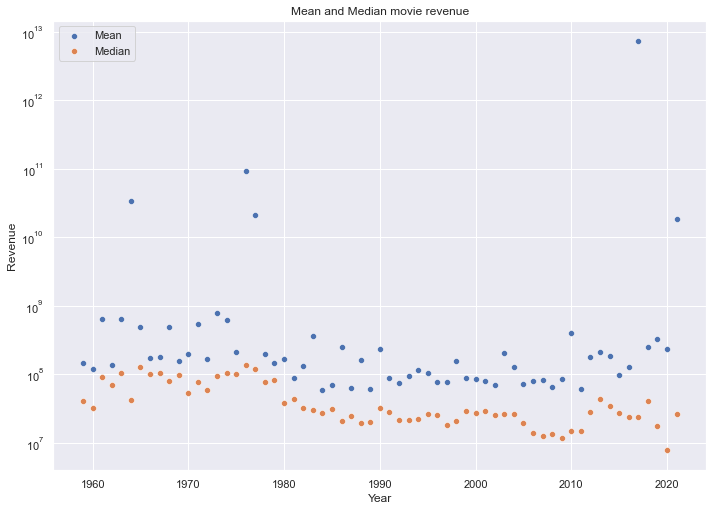

In [24]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
splot = sns.scatterplot(inflation_years, inflation_mean_revenue,label='Mean')
splot = sns.scatterplot(inflation_years, inflation_median_revenue,label='Median')
splot.set(yscale="log")
plt.title('Mean and Median movie revenue')
plt.xlabel('Year')
plt.ylabel('Revenue')
plt.show()

The plot of the revenues corrected with inflation now shows us a more flat regime that without inflation. We can clearly identify some outlines. As a future study it can be nice to analyse which these movies are and why they have such a high revenue.

C:\Users\lisap\anaconda3\envs\IPLAB\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\lisap\anaconda3\envs\IPLAB\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


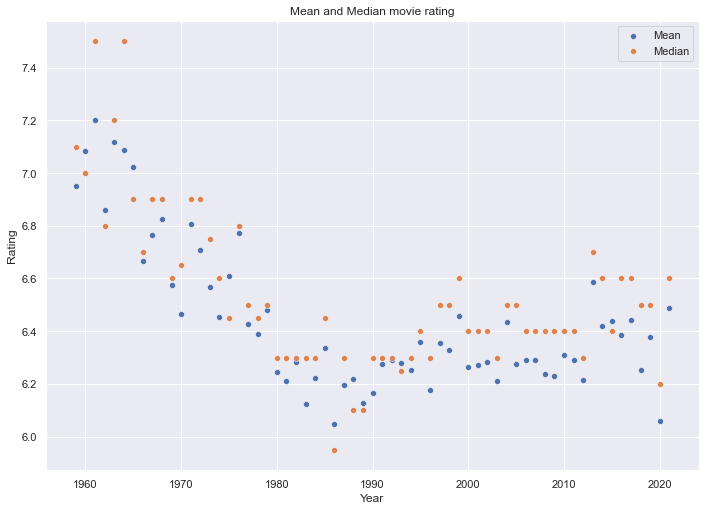

In [28]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
splot = sns.scatterplot(inflation_years, inflation_mean_rating,label='Mean')
splot = sns.scatterplot(inflation_years, inflation_median_rating,label='Median')
plt.title('Mean and Median movie rating')
plt.xlabel('Year')
plt.ylabel('Rating')
plt.show()

Let's try to do some statistics on the corrected revenues. It seems that the mean rating and the mean revenue are not linearly correlated. The median values seem to be significantly correlated with a quite high coefficient (0.54). This gives us the idea that the high revenue is correlated with high rating.

In [29]:
stats.pearsonr(inflation_mean_rating,inflation_mean_revenue)

(0.004014414243536319, 0.9750897245502157)

In [30]:
stats.pearsonr(inflation_median_rating,inflation_median_revenue)

(0.5416065232848095, 4.565418933575972e-06)